In [2]:
import xarray as xr
import netCDF4
import pydap.client
import pydap

#print("xarray engines:", xr.backends.list_engines())

In [3]:
# make an xarray object from the OPeNDAP url which gives the dataset without actually downloading it.
ds = xr.open_dataset("https://thredds.met.no/thredds/dodsC/c3s/cdr_ice_edge_nh_v3p0_agg")

In [4]:
print(ds)

<xarray.Dataset> Size: 122GB
Dimensions:                 (xc: 864, yc: 864, time: 13673, nv: 2)
Coordinates:
  * xc                      (xc) float64 7kB -5.394e+03 -5.381e+03 ... 5.394e+03
  * yc                      (yc) float64 7kB 5.394e+03 5.381e+03 ... -5.394e+03
  * time                    (time) datetime64[ns] 109kB 1978-10-25T12:00:00 ....
    lat                     (yc, xc) float32 3MB ...
    lon                     (yc, xc) float32 3MB ...
Dimensions without coordinates: nv
Data variables:
    Lambert_Azimuthal_Grid  int32 4B ...
    time_bnds               (time, nv) datetime64[ns] 219kB ...
    ice_edge                (time, yc, xc) float32 41GB ...
    uncertainty             (time, yc, xc) float32 41GB ...
    status_flag             (time, yc, xc) float32 41GB ...
Attributes: (12/46)
    title:                     Sea Ice Edge
    summary:                   Daily gridded Level-4 Sea Ice Edge Climate Dat...
    topiccategory:             Oceans ClimatologyMeteorologyAt

In [ ]:
# Optional: select a time slice and download locally
subset = ds.sel(time='2000-01-01')  # example time slice
subset.to_netcdf("ice_edge_2000_01_01.nc")

In [5]:
import pandas as pd
import xarray as xr

# Define your desired date range
date_range = pd.date_range(start='2000-01-01', end='2001-01-01', freq='ME')

# Create a list to store each time slice
slices = []

# Loop through each date, extract and store the slice
for date in date_range:
    date_str = date.strftime('%Y-%m-%d')
    try:
        subset = ds.sel(time=date_str, method='nearest')
        subset = subset.expand_dims(time=[pd.to_datetime(date_str)])  # make sure 'time' is preserved
        slices.append(subset)
    except KeyError:
        print(f"Skipping missing date: {date_str}")

# Concatenate all slices along the time dimension
combined = xr.concat(slices, dim='time')

# Save the combined dataset
combined.to_netcdf("ice_edge_2000_full_year.nc")
print("Combined dataset saved to ice_edge_2000_full_year.nc")

Combined dataset saved to ice_edge_2000_full_year.nc


In [5]:
combined = xr.open_dataset("ice_edge_2000_full_year.nc")
combined

<xarray.Dataset> Size: 113MB
Dimensions:                 (time: 12, nv: 2, yc: 864, xc: 864)
Coordinates:
  * time                    (time) datetime64[ns] 96B 2000-01-31 ... 2000-12-31
  * xc                      (xc) float64 7kB -5.394e+03 -5.381e+03 ... 5.394e+03
  * yc                      (yc) float64 7kB 5.394e+03 5.381e+03 ... -5.394e+03
    lat                     (yc, xc) float32 3MB ...
    lon                     (yc, xc) float32 3MB ...
Dimensions without coordinates: nv
Data variables:
    Lambert_Azimuthal_Grid  (time) int32 48B ...
    time_bnds               (time, nv) datetime64[ns] 192B ...
    ice_edge                (time, yc, xc) float32 36MB ...
    uncertainty             (time, yc, xc) float32 36MB ...
    status_flag             (time, yc, xc) float32 36MB ...
Attributes: (12/46)
    title:                     Sea Ice Edge
    summary:                   Daily gridded Level-4 Sea Ice Edge Climate Dat...
    topiccategory:             Oceans ClimatologyMeteorologyAtmosphere
    keywords:                  GCMDSK:Earth Science > Cryosphere > Sea Ice > ...
    keywords_vocabulary:       GCMDSK:GCMD Science Keywords:https://gcmd.eart...
    geospatial_lat_min:        16.62393
    ...                        ...
    processing_level:          Level-4 (l4)
    tracking_id:               dc0d03b5-65ca-4b09-bf97-840673be44bc
    doi:                       https://doi.org/10.24381/cds.29c46d83
    naming_authority:          no.met
    Conventions:               CF-1.7, ACDD-1.3
    standard_name_vocabulary:  CF Standard Name Table (Version 78, 21 Septemb...

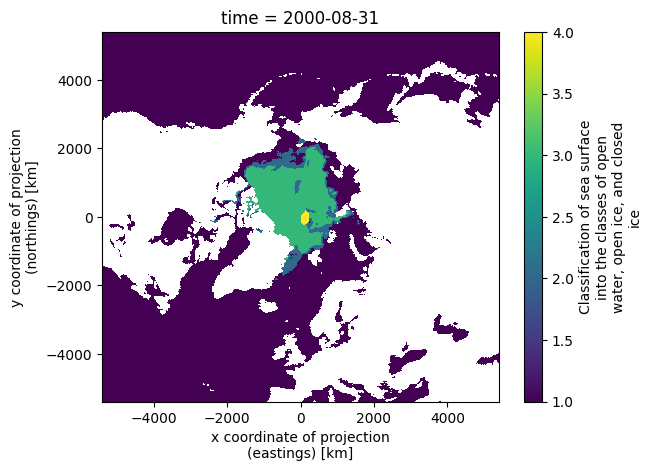

In [14]:
combined['ice_edge'].sel(time='2000-09-01', method = "nearest").plot()

In [ ]:
ds.plot.scatter(x = "time", y = "ice_edge")